In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Run this cell so pandas displays all columns
pd.set_option('display.max_columns', None)

In [3]:
tiktok_df = pd.read_csv('tiktok_dataset.csv')

In [4]:
#Examine the first few rows of the dataframe
tiktok_df.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [5]:
# Get the size and shape of the data
print(tiktok_df.shape, tiktok_df.size)

(19382, 12) 232584


In [6]:
# Get basic information about the data
tiktok_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [7]:
# Generate a table of descriptive statistics
tiktok_df.describe(include='all')

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.500000,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


# **[Tableau Visuals: EDA of TikTok Dataset](https://public.tableau.com/app/profile/maurice.mayes/viz/EDAofTikTokDataset/EDAofTikTokDataset?publish=yes)**

#### **video_duration_sec**

Create a box plot to examine the spread of values in the `video_duration_sec` column.

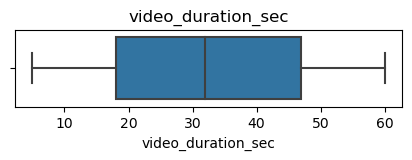

In [8]:
plt.figure(figsize=(5,1))
plt.title('video_duration_sec')
sns.boxplot(x=tiktok_df['video_duration_sec'])
plt.show()

Create a histogram of the values in the `video_duration_sec` column to further explore the distribution of this variable.

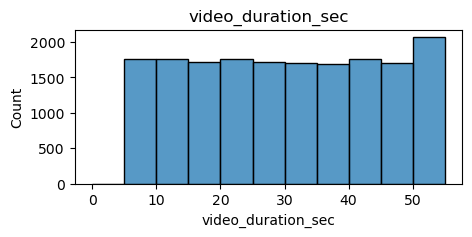

In [9]:
plt.figure(figsize=(5,2))
plt.title('video_duration_sec')
sns.histplot(tiktok_df['video_duration_sec'], bins=range(0, 60, 5))
plt.show()

All videos are 5-60 seconds in length, and the distribution is uniform.

#### **video_view_count**

Create a box plot to examine the spread of values in the `video_view_count` column.

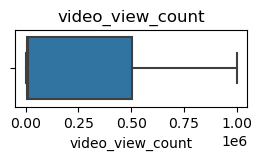

In [10]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(3, 1))
plt.title('video_view_count')
sns.boxplot(x=tiktok_df['video_view_count']);

Create a histogram of the values in the `video_view_count` column to further explore the distribution of this variable.

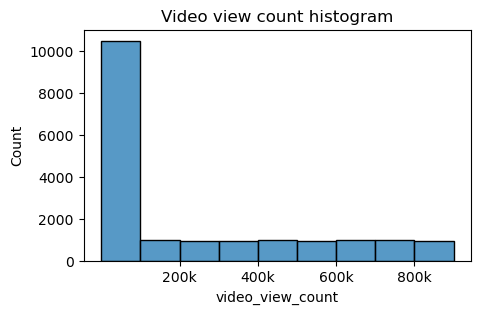

In [11]:
plt.figure(figsize=(5,3))
vid_view_hist = sns.histplot(tiktok_df['video_view_count'], bins=range(0,(10**6),10**5))
labels = [str(i) + 'k' for i in range(200, 801, 200)]
vid_view_hist.set_xticks(range(200000, 800001,200000), labels = labels)
plt.title('Video view count histogram');

This variable has a very uneven distribution, with more than half the videos receiving fewer than 100,000 views.

#### **video_like_count**

Create a box plot to examine the spread of values in the `video_like_count` column.

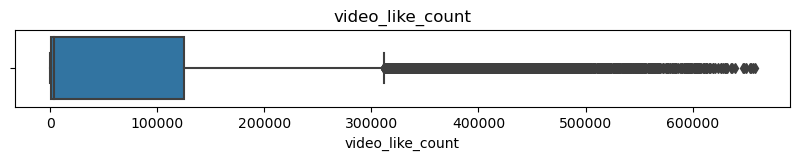

In [12]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(10,1))
plt.title('video_like_count')
sns.boxplot(x=tiktok_df['video_like_count']);

Create a histogram of the values in the `video_like_count` column to further explore the distribution of this variable.

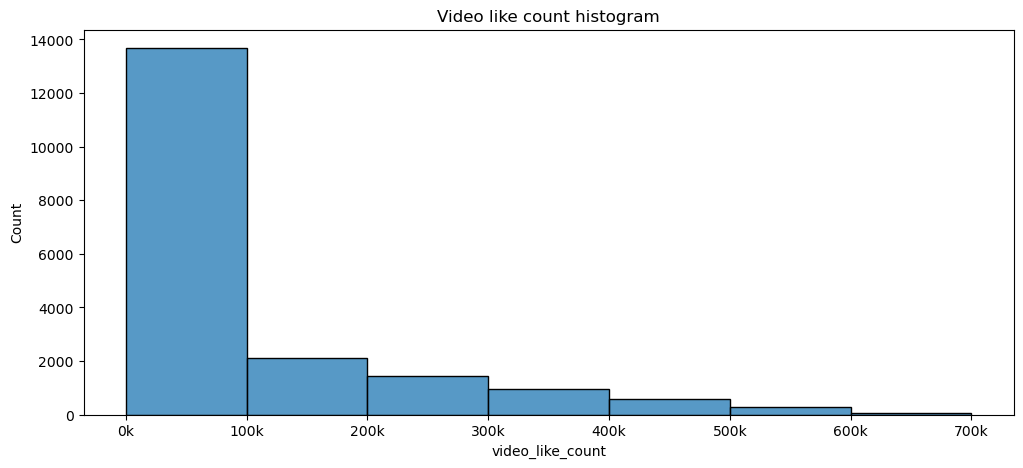

In [13]:
plt.figure(figsize=(12,5))
vid_like_hist = sns.histplot(tiktok_df['video_like_count'], bins=range(0,(700*1000+1),100*1000))
labels = [str(i) + 'k' for i in range(0,701,100)]
vid_like_hist.set_xticks(range(0,(700*1000 +1),100*1000), labels=labels)
plt.title('Video like count histogram');

Similar to view count, there are far more videos with < 100,000 likes than there are videos with more. However, in this case, there is more of a taper, as the data skews right.


#### **video_comment_count**

Create a box plot to examine the spread of values in the `video_comment_count` column.

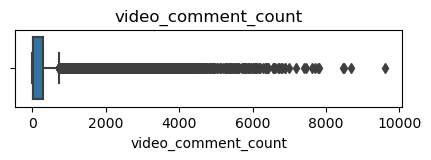

In [14]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(5,1))
plt.title('video_comment_count')
sns.boxplot(x=tiktok_df['video_comment_count']);

Create a histogram of the values in the video_comment_count column to further explore the distribution of this variable.

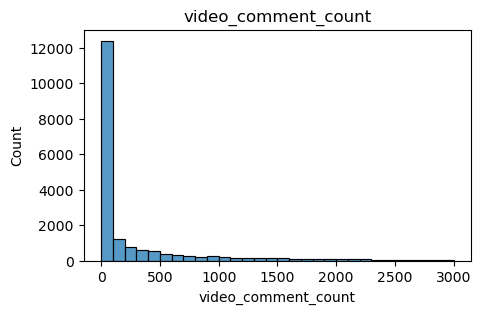

In [15]:
plt.figure(figsize=(5,3))
plt.title('video_comment_count')
sns.histplot(tiktok_df['video_comment_count'], bins = range(0,3001,100));

 Again, the vast majority of videos are grouped at the bottom of the range of values for video comment count. Most videos have fewer than 100 comments. The distribution is very right-skewed.

#### **video_share_count**

Create a box plot to examine the spread of values in the `video_share_count` column.

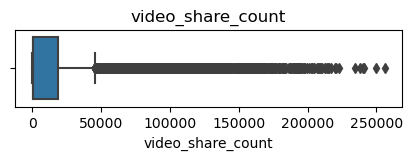

In [16]:
# Create a boxplot to visualize distribution of `video_share_count`
plt.figure(figsize=(5,1))
plt.title('video_share_count')
sns.boxplot(x=tiktok_df['video_share_count']);

Create a histogram of the values in the `video_download_count` column to further explore the distribution of this variable.

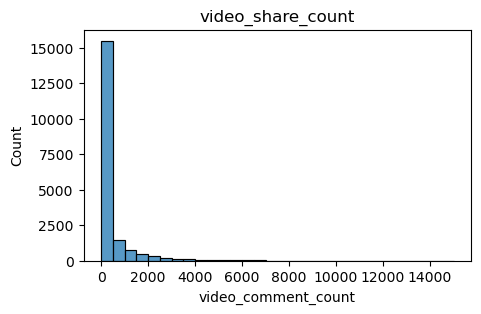

In [17]:
plt.figure(figsize=(5,3))
plt.title('video_share_count')
sns.histplot(tiktok_df['video_comment_count'], bins = range(0,15001,500));

The majority of videos were downloaded fewer than 500 times, but some were downloaded over 12,000 times. The data is very skewed to the right.

#### **Claim status by verification status**

create a histogram with four bars: one for each combination of claim status and verification status.

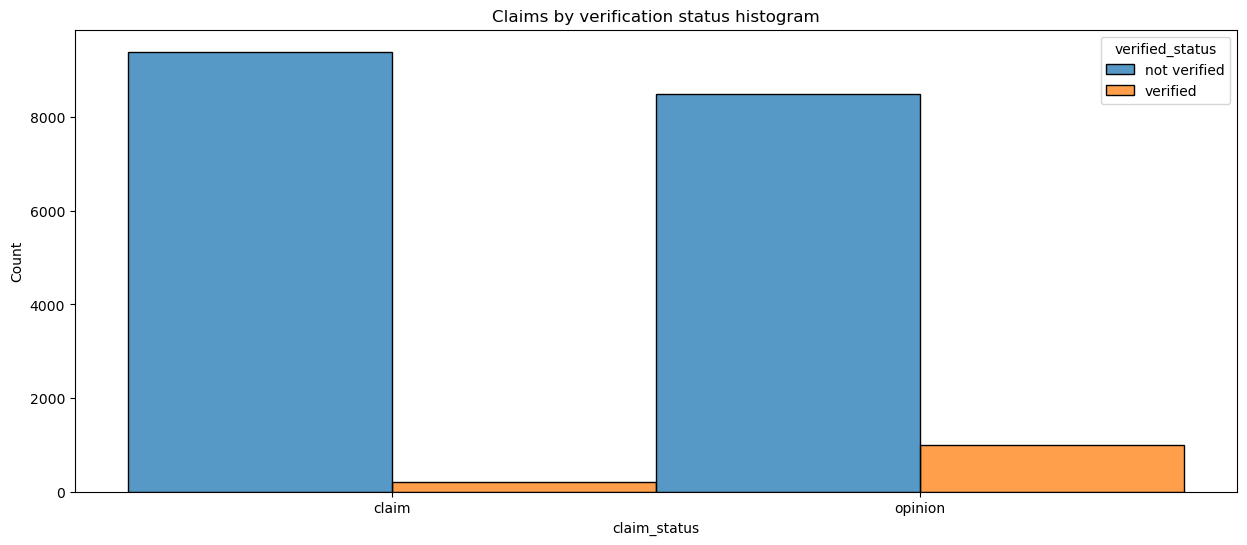

In [18]:
plt.figure(figsize=(15,6))
sns.histplot(multiple='dodge',
        data = tiktok_df,
        x = 'claim_status',
        hue = 'verified_status',
        
)
plt.title('Claims by verification status histogram');


There are far fewer verified users than unverified users, but if a user *is* verified, they are much more likely to post opinions.

#### **Claim status by author ban status**

examine the count of each claim status for each author ban status,use a histogram to communicate the information.

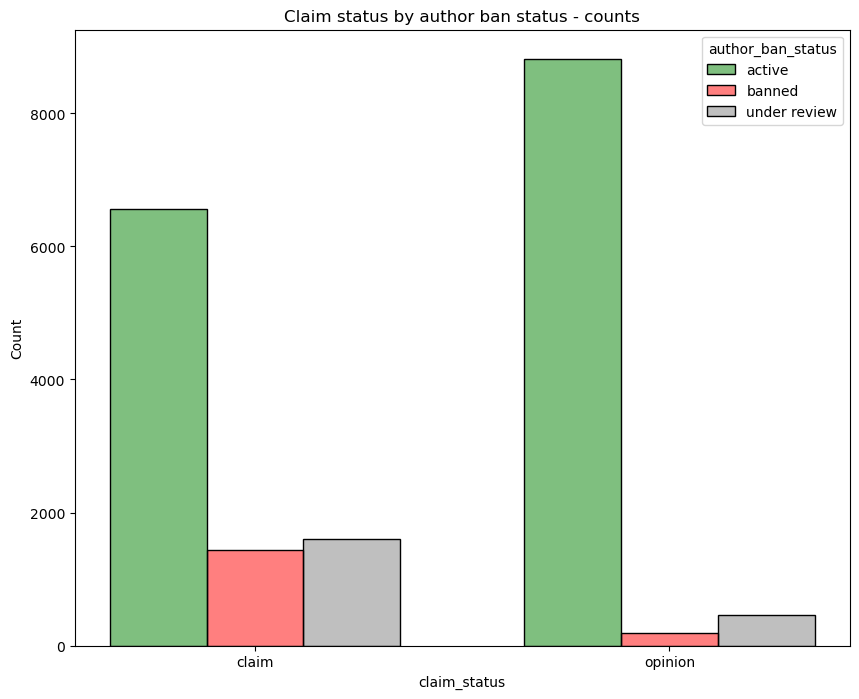

In [19]:
plt.figure(figsize=(10,8))
sns.histplot(multiple='dodge',
            data = tiktok_df,
             x = 'claim_status',
             hue = 'author_ban_status',
              hue_order=['active', 'banned', 'under review'], 
             palette= {'active': 'green', 'banned': 'red', 'under review': 'grey'},
             alpha = 0.5, #Fade Color
            shrink=.7 #size of bars
             
             
)
plt.title('Claim status by author ban status - counts');

For both claims and opinions, there are many more active authors than banned authors or authors under review; however, the proportion of active authors is far greater for opinion videos than for claim videos. Again, it seems that authors who post claim videos are more likely to come under review and/or get banned.

#### **Median view counts by ban status**

Create a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status.

In [20]:
ban_status_median = tiktok_df.groupby(['author_ban_status']).median(numeric_only=True).reset_index()
ban_status_median

,author_ban_status,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,active,10966.0,5.624036e+09,33.0,8616.0,2222.0,437.0,28.0,5.0
1,banned,5304.0,5.563176e+09,32.0,448201.0,105573.0,14468.0,892.0,209.0
2,under review,6175.5,5.607722e+09,31.0,365245.5,71204.5,9444.0,610.5,136.5


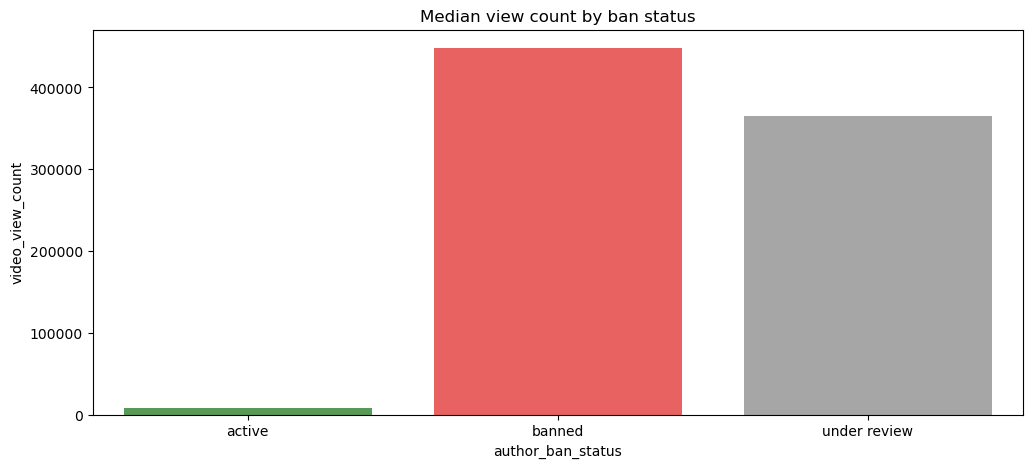

In [21]:
plt.figure(figsize=(12,5))
plt.title('Median view count by ban status')
sns.barplot(data = ban_status_median,
            x = 'author_ban_status',
            y = 'video_view_count',
            order= ['active', 'banned', 'under review'],
            palette={'active': 'green', 'banned': 'red', 'under review': 'grey'},
            alpha = .7
           );

The median view counts for non-active authors are many times greater than the median view count for active authors. Since you know that non-active authors are more likely to post claims, and that videos by non-active authors get far more views on aggregate than videos by active authors, then `video_view_count` might be a good indicator of claim status.

In [22]:
#A quick check of the median view count by claim status bears out this assessment:
tiktok_df.groupby('claim_status')['video_view_count'].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

#### **Total views by claim status**

Create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.

In [23]:
tik_claim_views_count = tiktok_df.groupby('claim_status')[['video_view_count']].sum().reset_index()
tik_claim_views_count

,claim_status,video_view_count
0,claim,4.813891e+09
1,opinion,4.696715e+07


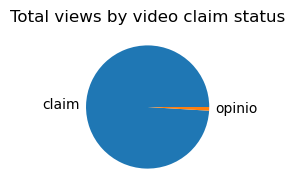

In [24]:
plt.figure(figsize=(4,2))
plt.pie(data=tik_claim_views_count, x ='video_view_count', labels=['claim', 'opinio'])
plt.title('Total views by video claim status');

The overall view count is dominated by claim videos even though there are roughly the same number of each video in the dataset.

**Determine outliers:**
1. Calculate the IQR of the column
2. Calculate the median of the column
3. Calculate the outlier threshold (median + 1.5 * IQR)
4. Calculate the numer of videos with a count in that column that exceeds the outlier threshold
5. Print "Number of outliers, {column name}: {outlier count}"

In [52]:
def num_outliers(df_list_column):
    columns = ['video_view_count','video_like_count','video_share_count','video_download_count',
              'video_comment_count']
    if df_list_column in columns:
        q1 = tiktok_df[df_list_column].quantile(0.25)
        q3 = tiktok_df[df_list_column].quantile(0.75)
        iqr = q3 - q1
        median = tiktok_df[df_list_column].median()
        outlier_threshold = median + (1.5*iqr)
        outlier_count = (tiktok_df[df_list_column] > outlier_threshold).sum()
        print(f"The number of outliers for '{df_list_column}' is: {outlier_count}")

In [50]:
columns = list(tiktok_df.select_dtypes(include='number'))

In [53]:
for column in columns:
    num_outliers(column)

The number of outliers for 'video_view_count' is: 2343
The number of outliers for 'video_like_count' is: 3468
The number of outliers for 'video_share_count' is: 3732
The number of outliers for 'video_download_count' is: 3733
The number of outliers for 'video_comment_count' is: 3882


#### **Scatterplot**

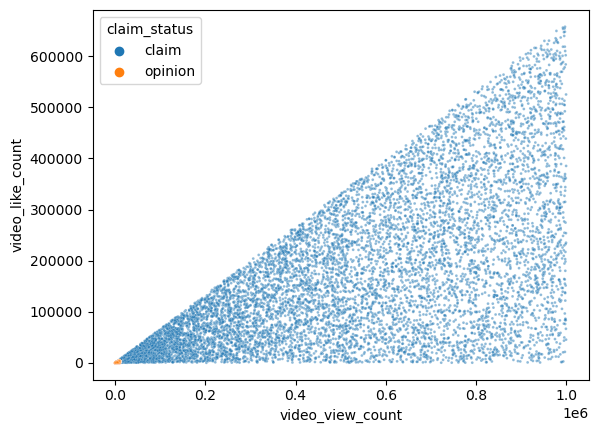

In [61]:
# Create a scatterplot of `video_view_count` versus `video_like_count` 
#according to 'claim_status'
sns.scatterplot(x = tiktok_df['video_view_count'], 
                y = tiktok_df['video_like_count'], 
                hue = tiktok_df['claim_status'], alpha = .5, s = 4); # s = size of data points

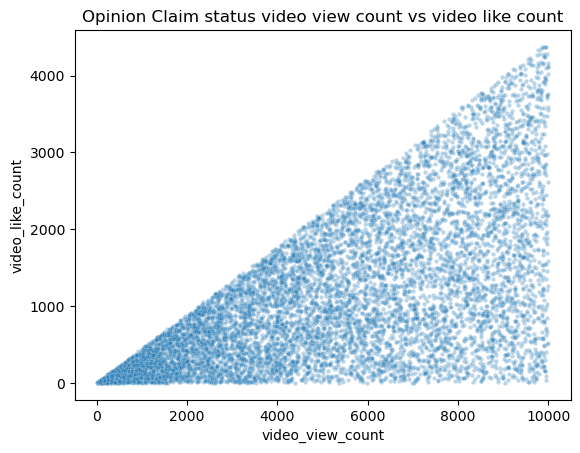

In [63]:
# Create a scatterplot of `video_view_count` versus `video_like_count` for opinions only
opinion = tiktok_df[tiktok_df['claim_status']=='opinion']
sns.scatterplot(x=opinion["video_view_count"], y=opinion["video_like_count"],
                 s=10, alpha=.3)
plt.title('Opinion Claim status video view count vs video like count');